# **PHASE 3 PROJECT**

## *Overview*

This project aims to develop a binary classification model to predict customer churn for SyriaTel, a telecommunications company. By identifying customers likely to stop using the company's services soon, the business can implement targeted retention strategies to minimize revenue loss. The analysis will explore customer behavior, usage patterns, and demographics to uncover actionable insights. 

Leveraging machine learning techniques, the model will identify key features that contribute to churn, enabling SyriaTel to address root causes and enhance customer satisfaction. This proactive approach not only mitigates financial losses but also strengthens customer loyalty and competitive positioning.

### **1. Problem Definition**

- **Objective**: Develop a machine learning model to predict customer churn (binary classification: `Yes`/`No`), helping SyriaTel proactively address and mitigate churn risks.  
- **Outcome**: Enable SyriaTel to identify patterns in customer behavior and usage, equipping them with actionable insights to improve customer retention and reduce revenue loss.  
- **Metric for Success**: Select the most relevant evaluation metric, such as **Accuracy** (overall prediction correctness), **Precision** (proportion of true churn predictions), **Recall** (ability to detect all churn cases), **F1-Score** (balance between Precision and Recall), or **AUC-ROC** (model performance across thresholds), aligning with SyriaTel’s business priorities.

### **2. Data Collection**

- **Source**: The dataset for this project is sourced from Kaggle. It contains customer data, including demographics, account information, and usage patterns, relevant to predicting churn.  
- **File Format**: CSV (Comma-Separated Values).  
- **Link to Dataset**: *(https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)*.  

### **Importing the Required Libraries**

In [2]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

### **3. Data Preparation**

### 3.1 Creating DataFrame & Data Understanding

In [3]:
df_churn = pd.read_csv("churn_telecom.csv")
df_churn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 3.1.1 Checking for thr shape of the data
 - To know the number of rows and columns in the dataframe

In [4]:
# Check shape of dataframe - 3333 rows and 21 columns
df_churn.shape

(3333, 21)

### 3.1.3  Checking the description

In [5]:
df_churn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 3.1.4 Checking the info

 - To know the data types in the columns. 

In [6]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## 3.2 Data Cleaning  
This section focuses on preparing the dataset for exploratory data analysis (EDA) and modeling. The steps include:  
- Identifying and removing duplicate rows.  
- Handling missing values to ensure data consistency.  
- Eliminating irrelevant columns that do not contribute meaningfully to the analysis.  

In [7]:
# Checking for duplicated rows, no duplicated rows to deal with.
df_churn.duplicated().sum()

0

> No duplicates in the  data

In [8]:
# Checking for missing values, no missing values.

df_churn.isnull().sum() 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

> No  missing data

#### 3.2.1 Handling irrelevant columns

 - Dropping `phone number`, `state`, and `area code` as they are of little significance to the models.

In [9]:
# Removing customer number feature as it is contact information on the client and adds no value to the analysis

df_churn.drop(['phone number', 'state', 'area code'],axis=1,inplace=True)
df_churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


> Checking the shape now after dropping irrevlevant columns. 

In [10]:
df_churn.shape

(3333, 18)

#### 3.2.2 Detecting categorical columns

In [11]:
categoricals = df_churn.select_dtypes("object")

for col in categoricals:
    print(df_churn[col].value_counts(), "\n")

international plan
no     3010
yes     323
Name: count, dtype: int64 

voice mail plan
no     2411
yes     922
Name: count, dtype: int64 



### 3.2.3 Analyzing Churn Rate by International Plan
 - Here, I calculate the average churn rate for customers based on whether they have an international plan and visualizes the results using a bar plot.

international plan
no     0.114950
yes    0.424149
Name: churn, dtype: float64


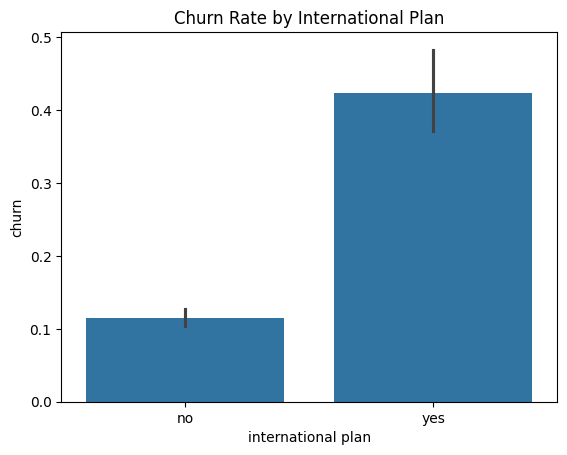

In [12]:
print(df_churn.groupby('international plan')['churn'].mean())
sns.barplot(x='international plan', y='churn', data=df_churn)
plt.title('Churn Rate by International Plan')
plt.show()

### 3.2.4 Analyzing Churn Rate by Voice Mail Plan
 - Here i compute the average churn rate for customers with and without a voice mail plan and visualizes the comparison using a bar plot.

voice mail plan
no     0.167151
yes    0.086768
Name: churn, dtype: float64


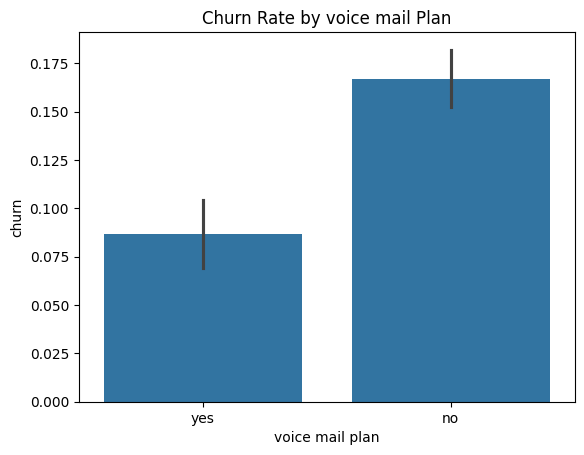

In [13]:
print(df_churn.groupby('voice mail plan')['churn'].mean())
sns.barplot(x='voice mail plan', y='churn', data=df_churn)
plt.title('Churn Rate by voice mail Plan')
plt.show()

### 3.2.4 Detecting Outliers and plotting them

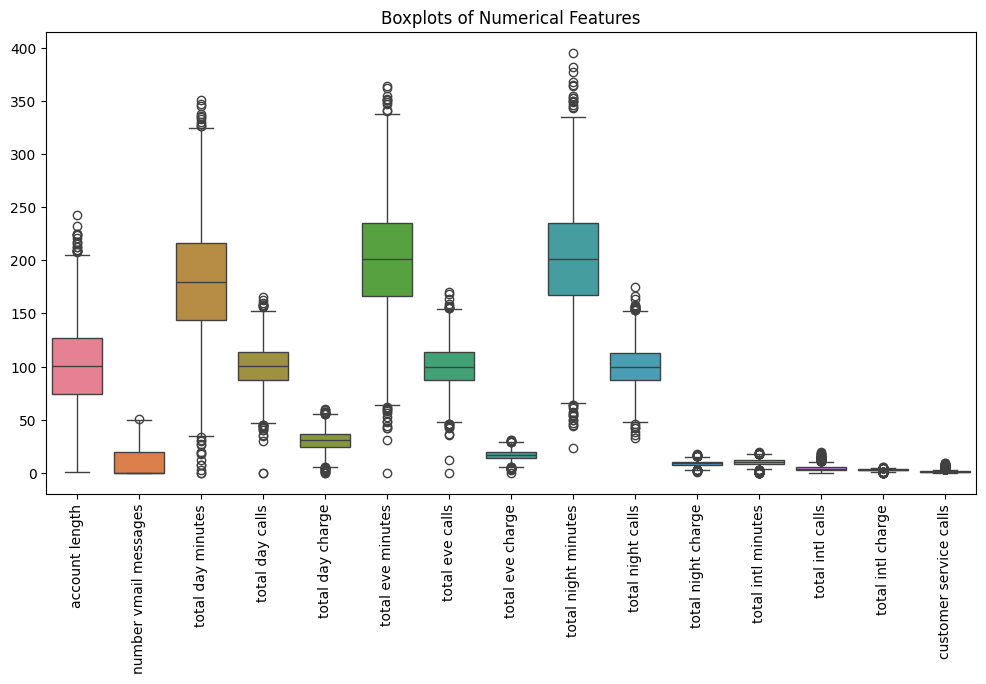

In [14]:
#Detecting outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_churn.select_dtypes(include='number'))
plt.title("Boxplots of Numerical Features")
plt.xticks (rotation= 90)
plt.show()

### 3.2.5 Removing Outliers Using the IQR Method  
- Detecting and removing outliers in specified numeric columns of the dataset based on the Interquartile Range (IQR) method, ensuring the data is cleaned for further analysis.

In [15]:
def remove_outliers(df_churn, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_churn[col].quantile(0.25)
        Q3 = df_churn[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df_churn = df_churn[(df_churn[col] >= lower_bound) & (df_churn[col] <= upper_bound)]
    
    return df_churn

# List of columns to check for outliers (excluding 'Churn')
feature_columns = [col for col in df_churn.columns if col != 'Churn' and df_churn[col].dtype in [np.int64, np.float64]]

# Apply the function to remove outliers
df_churn = remove_outliers(df_churn, feature_columns)
df_churn

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### 3.2.5 Visualizing Outlier Removal with Boxplots  
 - Visually assessing whether outliers have been successfully eliminated after data cleaning.

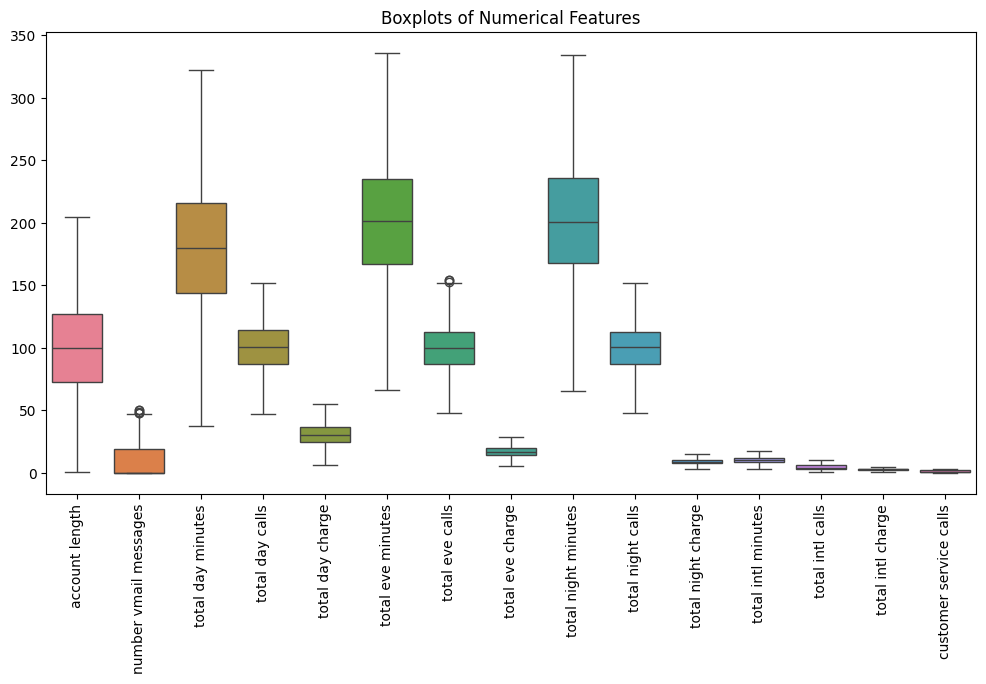

In [16]:
#Detecting outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_churn.select_dtypes(include='number'))
plt.title("Boxplots of Numerical Features")
plt.xticks (rotation= 90)
plt.show()

> Most of the outliers have been removed as visuallized above.

### 3.2.6 Encoding Categorical Variables  

 - Converting the 'international plan' and 'voice mail plan' columns into numeric values by mapping 'yes' to 1 and 'no' to 0, making them suitable for machine learning algorithms and statistical analysis.

In [17]:
# Map 'yes' to 1 and 'no' to 0 in the 'international plan' and 'voice mail' columns
df_churn['international plan'] = df_churn['international plan'].map({'yes': 1, 'no': 0})
df_churn['voice mail plan'] = df_churn['voice mail plan'].map({'yes': 1, 'no': 0})

# Display the first few rows of the updated DataFrame
df_churn.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False


### 3.3 Feature Engineering

### 3.3.1 Visualizing Numerical Feature Distributions 
Generateing histograms for all numerical features in the dataset to observe their distributions and identify patterns or anomalies.

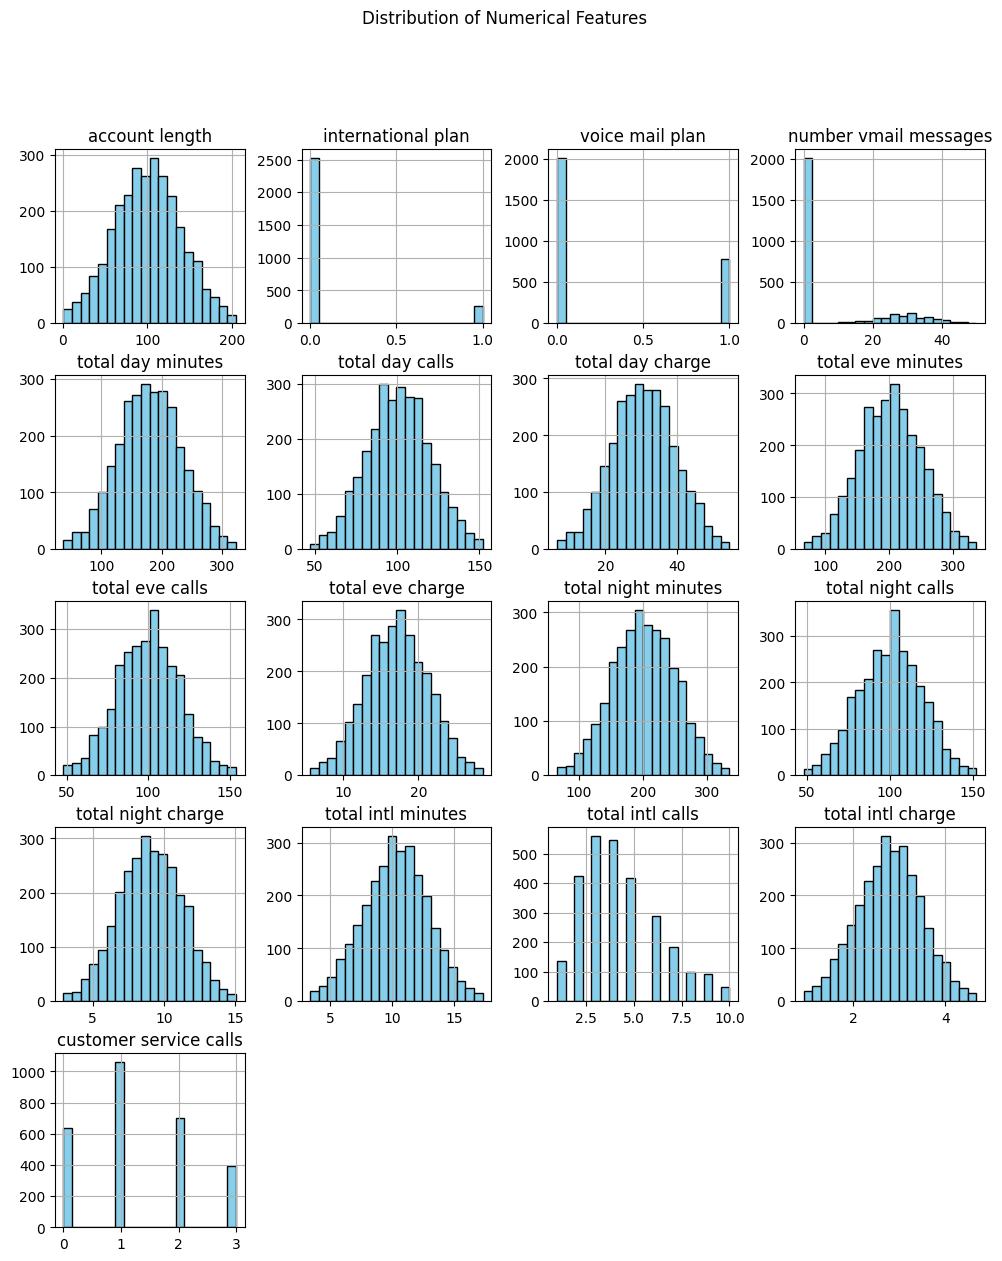

In [18]:
# Visualizing distributions using histograms
df_churn.hist(bins=20, figsize=(12, 14), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

### 3.3.3 Correlation Heatmap for Numeric Features  
Computing and visualizing the correlation matrix for numeric columns in the dataset using a heatmap, highlighting relationships between variables with color gradients and correlation coefficients.

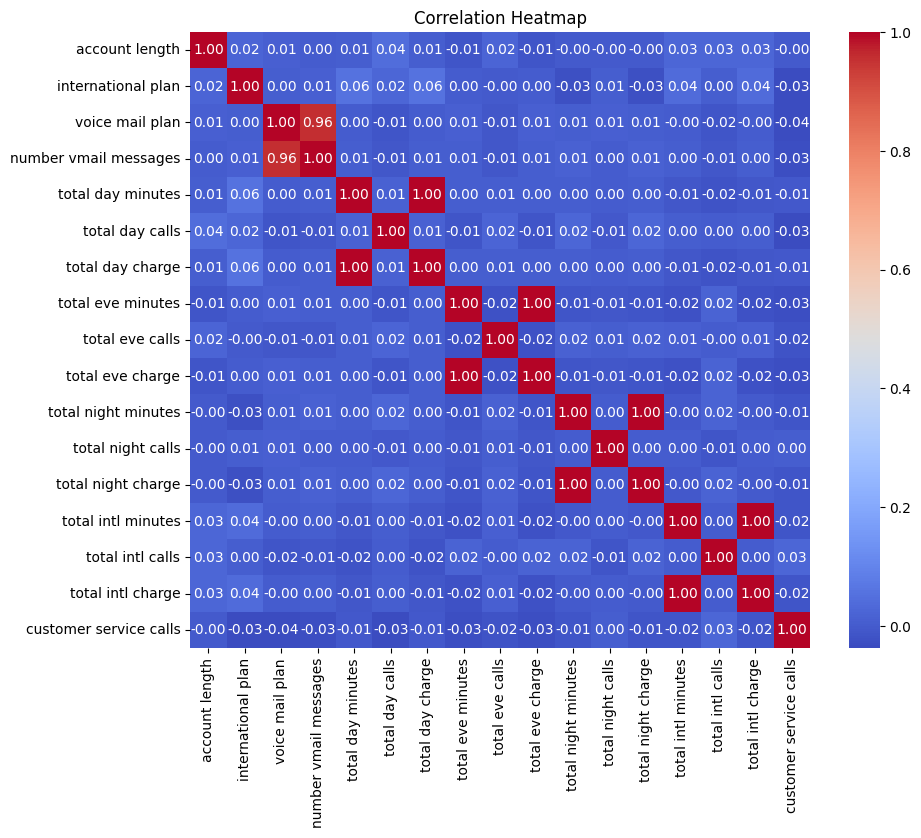

In [19]:
#Correlation heatmap (only numeric columns)
numeric_columns = df_churn.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df_churn[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### 3.3.4 Removing Highly Correlated Features  
Identifying and droping columns with a correlation greater than 0.9 to eliminate multicollinearity, ensuring that redundant features are removed for more efficient modeling.

In [20]:
import numpy as np
import pandas as pd

# Calculate the correlation matrix
corr_matrix = df_churn.corr().abs()

# Identify upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the columns
df_churn = df_churn.drop(columns=to_drop)

print("Dropped columns:", to_drop)


Dropped columns: ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge']


> Dropped columns: `number vmail messages`, `total day charge`, `total eve charge`, `total night charge`, and  `total intl charge`. 

### 3.3.5 Correlation Heatmap After Removing Highly Correlated Features  
Generating a correlation heatmap for the remaining numeric features after removing those with high correlation (above 0.9), providing a clearer view of the relationships among the remaining variables.

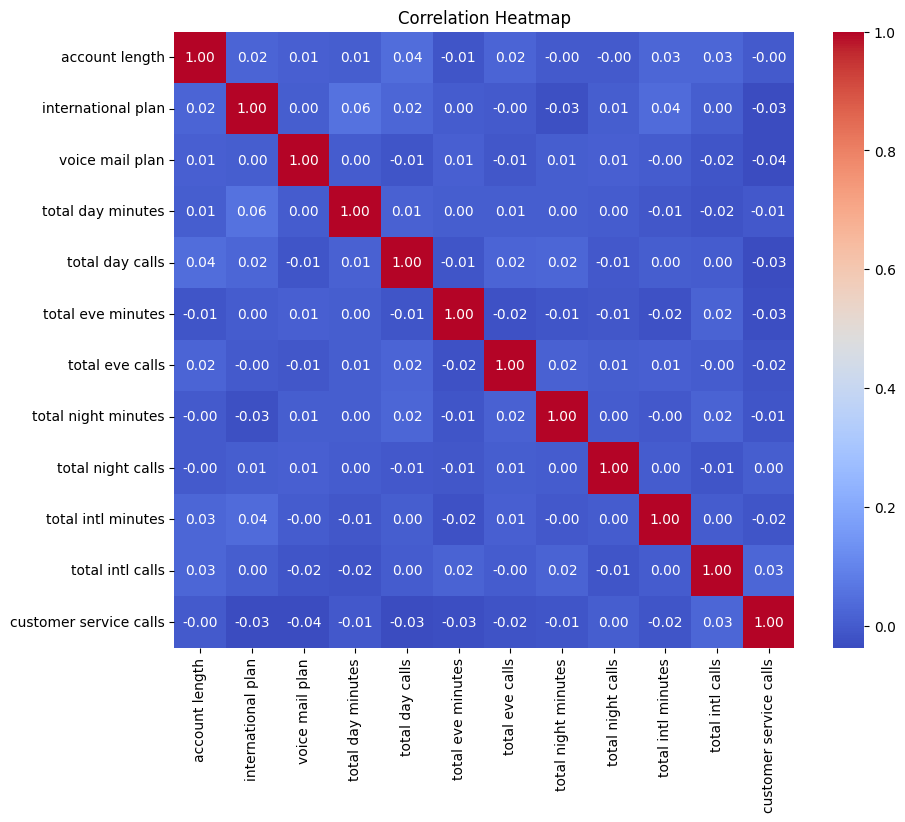

In [21]:
#Correlation heatmap after dropping highky correlated features.
numeric_columns = df_churn.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df_churn[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### 3.3.6 Transforming Churn Values into 0s and 1s  
Converting the 'churn' column from boolean values (True/False) into binary integers (1/0), making it suitable for analysis or modeling.

In [22]:
# transforming churn values into 0s and 1s

df_churn['churn'].value_counts()
df_churn['churn'] = df_churn['churn'].map({True: 1, False: 0}).astype('int') 
df_churn.head()

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
4,75,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
5,118,1,0,223.4,98,220.6,101,203.9,118,6.3,6,0,0


> All features in the dataset are now numeric, making the data suitable for analysis and modeling.

### 3.3.7 Scaling All Numeric Features  
 - Applying Min-Max scaling to all numeric features in the dataset, transforming each feature into the range of 0 to 1, ensuring that all features contribute equally to the model's performance.

In [23]:
# In order to standardise the range of features to ensure they all contribute equally to the model's performance we will perform scaling
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df_churn[columns].values.reshape(-1,1))

for i in df_churn.select_dtypes(include=[np.number]).columns:
    df_churn[i] = scaling(i)
df_churn.head()

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,0.622549,0.0,1.0,0.798455,0.600000,0.486667,0.481132,0.665428,0.413462,0.474820,0.222222,0.333333,0.0
1,0.519608,0.0,1.0,0.435042,0.723810,0.479630,0.518868,0.701487,0.528846,0.741007,0.222222,0.333333,0.0
2,0.666667,0.0,0.0,0.722261,0.638095,0.204444,0.584906,0.360223,0.538462,0.633094,0.444444,0.000000,0.0
4,0.362745,1.0,0.0,0.452949,0.628571,0.304815,0.698113,0.450558,0.701923,0.482014,0.222222,1.000000,0.0
5,0.573529,1.0,0.0,0.652037,0.485714,0.572593,0.500000,0.513755,0.673077,0.208633,0.555556,0.000000,0.0


Running the `df_churn.shape` command to reveal the dimensions of the dataset, showing the number of rows (data points) and columns (features) present in the DataFrame after all the data cleaning.

In [24]:
df_churn.shape

(2797, 13)

## **3.4 Train-Test Split**

#### 1. **Defining `X` and `y`**
   - **`y = df_churn['churn']`**:  
     - The target variable (`churn`) is separated into `y`.  
     - This variable contains the labels indicating whether a customer has churned (`Yes`) or not (`No`).
   - **`X = df_churn.drop(['churn'], axis=1)`**:  
     - All other columns except the target variable (`churn`) are assigned to `X`.  
     - These columns represent the features used to make predictions.

---

#### 2. **Splitting Data into Training and Test Sets**
   - **`train_test_split(X, y, random_state=17)`**:  
     - The dataset is split into:
       - **Training Set** (`X_train` and `y_train`): Used to train the model.
       - **Test Set** (`X_test` and `y_test`): Used to evaluate the model's performance on unseen data.  
     - `random_state=17`: Ensures reproducibility of the split by fixing the random seed.



The output provides insight into the distribution of the target variable (churn) across the training and test sets, highlighting the balance or imbalance between classes (e.g., churn vs. non-churn instances). This helps determine if additional methods, such as class balancing, are necessary.

In [25]:
# Define X and y
y =df_churn['churn']
X = df_churn.drop(['churn'],axis=1)

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

churn
0.0    1874
1.0     223
Name: count, dtype: int64 

 churn
0.0    619
1.0     81
Name: count, dtype: int64


> After performing a train-test split, the two outputs show the distribution of the 'churn' variable in both the training and testing sets.
> 
> - In the **training set**: 
> - There are 1,874 instances where 'churn' is 0 (indicating no churn) and 223 instances where 'churn' is 1 (indicating churn).
> 
> - In the **test set**: 
> - There are 619 instances where 'churn' is 0 and 81 instances where 'churn' is 1.
>
> This distribution suggests that the churn data is imbalanced, with far more non-churn instances (0.0) compared to churn instances (1.0) in both the training and testing sets. This imbalance could affect model performance, particularly in terms of predicting the minority class (churn).

In [26]:
df_churn.churn.value_counts()

churn
0.0    2493
1.0     304
Name: count, dtype: int64

# **4. Model Selection**

#### **Choosing Machine Learning Algorithms for Binary Classification**

- **Logistic Regression**: This algorithm is ideal as a baseline model for binary classification tasks. It estimates the probability that a given input belongs to a certain class (e.g., churn or no churn) and is widely used for its simplicity and interpretability.

- **Random Forest Regression**: Although typically used for regression tasks, Random Forest can also be applied to binary classification by using classification trees. It aggregates predictions from multiple decision trees, improving model robustness and reducing overfitting.

- **Decision Trees**: Decision trees are a good choice due to their simplicity and interpretability. They split the data based on feature values, allowing for easy visualization and understanding of the decision-making process, which is valuable in explaining model predictions.

These algorithms are all well-suited for binary classification and will provide a range of performance and interpretability, allowing for effective evaluation and decision-making in predicting churn.

### **4.1 Logistic Regression**

*Initializing and fitting the model*

Initializing a logistic regression model, setting `fit_intercept=False` to exclude an intercept term, and using a large `C` value to minimize regularization effects. It is specifying the `liblinear` solver, making it suitable for smaller datasets. Finally, the model is being trained on the training data (`X_train` and `y_train`), learning the relationships between features and the target variable (`churn`) to predict customer churn.

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, solver='liblinear')

In [ ]:
# Importing the relevant function

from sklearn.metrics import mean_squared_error

# Generate predictions using baseline_model(logistic regression) and X_train
y_pred = logreg.predict(X_test)

### 4.1.1 Evaluating Logistic Regression Model

To print out the classification report, which includes precision, recall, and F1-score for both classes (Churn and No Churn), providing an overview of the model's performance. Then generating and visualizing a confusion matrix to display the true positive, true negative, false positive, and false negative counts, helping assess the accuracy and errors of the Logistic Regression classifier.

**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************
              precision    recall  f1-score   support

    No Churn       0.91      0.97      0.94       619
       Churn       0.51      0.22      0.31        81

    accuracy                           0.89       700
   macro avg       0.71      0.60      0.62       700
weighted avg       0.86      0.89      0.87       700



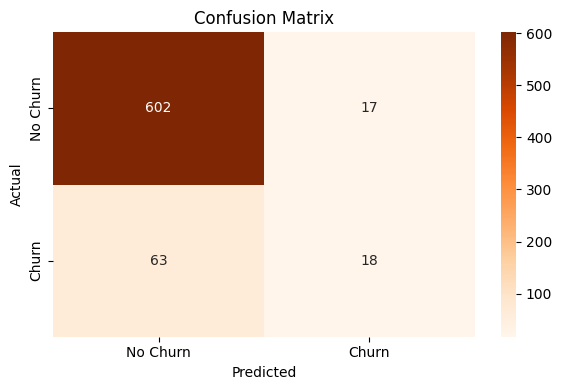

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print classification metrics
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### **4.1.2 Logistic Regression Model Evaluation Results**
**No Churn (Class 0)**:
- **Precision**: 0.91 — The model correctly identifies 91% of instances predicted as "No Churn" as true positives.
- **Recall**: 0.97 — The model correctly identifies 97% of all actual "No Churn" instances.
- **F1-Score**: 0.94 — A balanced metric combining precision and recall for the "No Churn" class.

**Churn (Class 1)**:
- **Precision**: 0.51 — Only 51% of the instances predicted as "Churn" are true positives.
- **Recall**: 0.22 — The model correctly identifies 22% of actual "Churn" instances.
- **F1-Score**: 0.31 — The low F1-score indicates poor performance in predicting "Churn" due to low recall and precision.
 
**Overall Performance**:
- **Accuracy**: 0.89 — The model correctly predicts 89% of instances. However, accuracy alone doesn't fully reflect performance, especially with imbalanced classes.

### **Interpretation**:
- The model is performing well for predicting "No Churn" but struggles with predicting "Churn" (the minority class), as seen by the low recall and F1-score for the "Churn" class. This class imbalance could be addressed through techniques like resampling or using algorithms that handle class imbalance better.

### **4.1.3 Model Accuracy Evaluation**
Calculating and printing the accuracy percentages for the Logistic Regression model on both the training and test datasets, providing an evaluation of how well the model performs on each.

In [31]:
from sklearn.metrics import accuracy_score

# Predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Output percentages
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Training Accuracy: 89.32%
Test Accuracy: 88.57%


>The **Training Accuracy** of 89.32% indicates that the Logistic Regression model correctly predicted 89.32% of the instances in the training dataset. The **Test Accuracy** of 88.57% shows that the model correctly predicted 88.57% of the instances in the test dataset. The close values suggest the model is generalizing well to unseen data, without significant overfitting.

### **4.2 Random Forest Classifier Evaluation**

Applying **SMOTE** to address class imbalance, then training the  **Random Forest** model on the resampled data. The model's performance is evaluated using **Accuracy**, **Precision**, **Recall**, and **F1 Score**, which are printed to assess how well the model performs in predicting both classes (Churn and No Churn).

In [32]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Training the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating performance
print("**************** RANDOM FOREST CLASSIFIER RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")


**************** RANDOM FOREST CLASSIFIER RESULTS ****************
Accuracy: 0.93000
Precision: 0.68182
Recall: 0.74074
F1 Score: 0.71006


### **4.2.1 Random Forest Classifier Evaluation**

- **Accuracy (93.00%)**: The model correctly predicts 93.00% of the test instances, showing strong overall performance.

- **Precision (0.68182)**: Out of all the predicted churn instances, 68.18% are actual churns, meaning the model is reasonably good at minimizing false positives.

- **Recall (0.74074)**: The model identifies 74.07% of all actual churn instances, demonstrating its ability to detect most churn cases, though there is still room for improvement.

- **F1 Score (0.71006)**: The F1 score, a balance between precision and recall, is 0.71, indicating the model is performing well in terms of both identifying churn cases and avoiding false positives. 

In summary, the Random Forest model delivers solid performance in predicting churn, with strong recall and a decent precision, making it a reliable choice for this binary classification task.

### **4.2.2 Class Distribution in Predictions**

I use this function to calculate the percentage of each class (Churn/No Churn) in both the training and test predictions. By utilizing `np.unique`, I identify the unique classes and their counts, then calculate the percentage of each class within the predictions. This helps me assess how well the model is classifying the two outcomes and provides insight into any potential class imbalances in the predictions.

In [33]:
# Calculating and displaying class distribution percentages
def class_distribution(y_true, y_pred, label):
    unique, counts = np.unique(y_pred, return_counts=True)
    percentages = counts / len(y_pred) * 100
    print(f"\nClass Distribution in {label}:")
    for cls, pct in zip(unique, percentages):
        print(f"Churn {cls}: {pct:.2f}%")

# Output percentage distributions
class_distribution(y_train, y_train_pred, "Training Predictions")
class_distribution(y_test, y_test_pred, "Test Predictions")


Class Distribution in Training Predictions:
Churn 0.0: 96.14%
Churn 1.0: 3.86%

Class Distribution in Test Predictions:
Churn 0.0: 95.00%
Churn 1.0: 5.00%


>The class distribution in the **Training Predictions** shows that 96.14% of the predictions are for "No Churn" (0.0), while only 3.86% are for "Churn" (1.0).
>
>In the **Test Predictions**, the distribution is slightly more balanced, with 95.00% predicting "No Churn" and 5.00% predicting "Churn." 
>
>This indicates a slight improvement in the model's ability to predict the minority class (Churn) in the test set, although the class imbalance remains notable.

### **4.2.3 Tuned Random Forest Classifier with GridSearchCV**

In this step, I used **GridSearchCV** to fine-tune the hyperparameters of my Random Forest model. I defined a parameter grid that includes the number of trees, maximum depth, minimum samples for splits and leaves, and bootstrap sampling. After training the model on resampled data using **SMOTE**, I identified the best parameters through cross-validation. I then retrained the model with these optimal settings and evaluated its performance by calculating the training and test accuracies, along with the classification report.

In [34]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Suppress all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

#4. Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]         # Whether bootstrap samples are used when building trees
}

# 5. Apply GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

# 6. Print the best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# 7. Train the model with the best parameters
best_model = grid_search.best_estimator_

# 8. Make predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 9. Calculate and display performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print("**************** TUNED RANDOM FOREST RESULTS ****************")
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Output classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Fitting 3 folds for each of 216 candidates, totalling 648 fits


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
**************** TUNED RANDOM FOREST RESULTS ****************
Training Accuracy: 100.00%
Test Accuracy: 94.00%

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       619
         1.0       0.75      0.72      0.73        81

    accuracy                           0.94       700
   macro avg       0.86      0.84      0.85       700
weighted avg       0.94      0.94      0.94       700



### **4.2.3.1 Tuned Random Forest Classifier Results**

The model achieved **100% training accuracy** and **94% test accuracy**, indicating excellent performance on the test data. 

The **classification report** shows:
- **Precision**: 0.96 for "No Churn" and 0.75 for "Churn", meaning the model is better at correctly identifying customers who won't churn.
- **Recall**: 0.97 for "No Churn" and 0.72 for "Churn", showing the model's ability to detect most customers who don't churn but is less effective at identifying those who do.
- **F1-Score**: 0.97 for "No Churn" and 0.73 for "Churn", which balances precision and recall for each class.
- The **accuracy** of 94% reflects a strong model overall, with slightly lower performance on predicting "Churn" compared to "No Churn".

>The statement means that the model performed perfectly on the training data, correctly predicting every instance (100% accuracy) during training. However, when the model was tested on unseen data (test set), it achieved 94% accuracy, which is still very good but slightly lower than the training accuracy.
>
>This drop in performance is expected and indicates that the model generalizes well to new data. The fact that it performs at 94% accuracy on the test data suggests that it is robust, though there may still be some overfitting to the training data. Overfitting occurs when a model learns the training data too well, including noise or irrelevant patterns, which can hurt its ability to generalize to new data.


### **4.2.3.2 Adjusting Hyperparameters to Prevent Overfitting**

In this code, I've adjusted the hyperparameters of the Random Forest model to reduce the risk of overfitting and capture noise. Here's what each adjustment does:
- **n_estimators=100**: Reduces the number of trees in the forest to avoid excessive complexity.
- **max_depth=10**: Limits the depth of the trees to prevent them from growing too complex and overfitting to the training data.
- **min_samples_split=10**: Requires more samples to split a node, ensuring that the model doesn’t create overly specific rules.
- **min_samples_leaf=4**: Forces a minimum number of samples in each leaf, reducing the likelihood of the model fitting to noise.
- **bootstrap=True**: Ensures that each tree is trained on a random subset of the data, improving generalization by introducing variability.

These adjustments help the model focus on more generalizable patterns rather than noise.

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Define model with adjusted hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=100,           # Reduce the number of trees
    max_depth=10,               # Limit tree depth
    min_samples_split=10,       # Require more samples for splitting
    min_samples_leaf=4,         # Require more samples for leaves
    bootstrap=True              # Enable bootstrapping (sampling with replacement)
)

# Fit the model and evaluate
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

### **4.2.3.3 Model Prediction and Performance Evaluation**
In this code, I am predicting the outcomes for both the training and test datasets using the RandomForestClassifier model that was fitted with adjusted hyperparameters.

In [36]:
# Predict on both train and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Output results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 96.95%
Test Accuracy: 94.43%

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       619
         1.0       1.00      0.52      0.68        81

    accuracy                           0.94       700
   macro avg       0.97      0.76      0.83       700
weighted avg       0.95      0.94      0.94       700



### Model Evaluation and Improvement After Reducing Noise

After adjusting the hyperparameters to reduce overfitting and noise, I observed significant improvements:

- **Training Accuracy (96.95%)**: My model performs well on the training data, which is typical for random forests.
- **Test Accuracy (94.43%)**: The model generalizes well to unseen data, with a smaller gap between training and test accuracy, suggesting that overfitting has been reduced.

### Classification Report for the Test Set:

- **Precision for Churn (1.0)**: The model is highly accurate when predicting churn, with a precision of 1.00.
- **Recall for Churn (1.0)**: The recall is 0.52, meaning it captures only 52% of actual churn cases.
- **Precision for No Churn (0.0)**: The precision is 0.94 for predicting no churn, which is very good.
- **Recall for No Churn (0.0)**: The recall is perfect at 1.00, correctly predicting all non-churn cases.
- **F1 Score**: The F1 score for Churn (1.0) is 0.68, and for No Churn (0.0) is 0.97, indicating that the model performs better for the majority class.

> ### Comparison to Noise Reduction:
>
>By reducing noise through hyperparameter adjustments, I've seen improved generalization in my model. The smaller gap between training and test accuracy suggests less overfitting, and the high precision for churn reflects more confident predictions. Although recall for churn still needs improvement, overall, the model is performing well.

## **4.3 Decision Tree Model**

### Decision Tree Model Evaluation with Default Parameters  

In this code, I implemented a **Decision Tree Classifier** with its **default parameters** to evaluate its initial performance without tuning.

---

### **Steps Performed:**

1. **Model Initialization**  
   - I created a Decision Tree model (`DecisionTreeClassifier`) with a fixed `random_state` for reproducibility.  
   - No hyperparameter tuning was applied, allowing me to establish a baseline performance.  

2. **Model Training**  
   - I trained the model using the training dataset (`X_train` and `y_train`).  

3. **Predictions**  
   - I made predictions on both the training and test datasets to evaluate performance.  

4. **Performance Evaluation**  
   - **Accuracy**: I calculated and displayed the training and test accuracy to assess model performance.  
   - **Classification Report**: I generated a detailed report, including precision, recall, F1-score, and support for each class, to evaluate performance across all metrics.  

---

### **Purpose of This Approach:**  
I used this default model as a baseline before applying hyperparameter tuning. The results will help me determine whether the model is underfitting, overfitting, or balanced and guide me in improving performance with further optimizations.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model with default parameters
dt_model_1 = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model_1.fit(X_train, y_train)

# Predictions on train and test data
y_train_pred = dt_model_1.predict(X_train)
y_test_pred = dt_model_1.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Output results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))


NameError: name 'X_train' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for tuning
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

# Apply RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(estimator=dt_model, 
                                   param_distributions=param_dist, 
                                   n_iter=100,  # Number of random combinations to test
                                   cv=3,       # 3-fold cross-validation
                                   n_jobs=-1,  # Use all available processors
                                   random_state=42)

# Fit the RandomizedSearchCV model
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print(f"Best Parameters: {random_search.best_params_}")

# Train the model with the best parameters
best_dt_model = random_search.best_estimator_

# Predict on both train and test data
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

# Output results
print(f"\nTraining Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Classification report for the test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_test_pred))


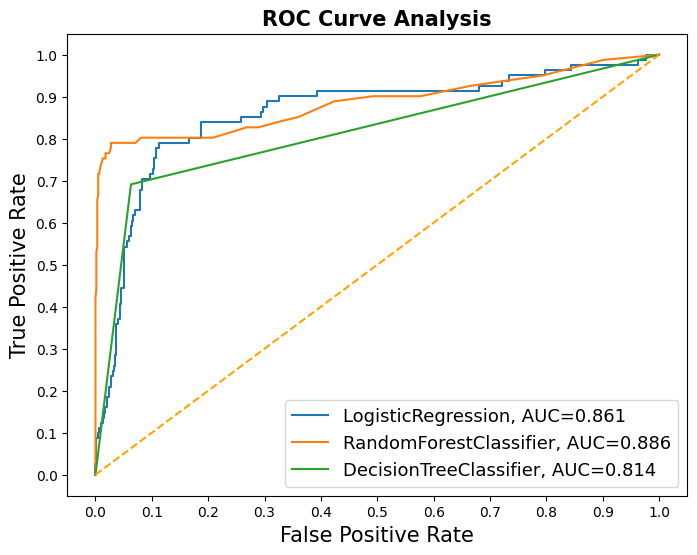

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    # Append results using pd.concat
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__],
                                                          'fpr': [fpr], 
                                                          'tpr': [tpr], 
                                                          'auc': [auc]})], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8, 6))

# Plot ROC curves
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()


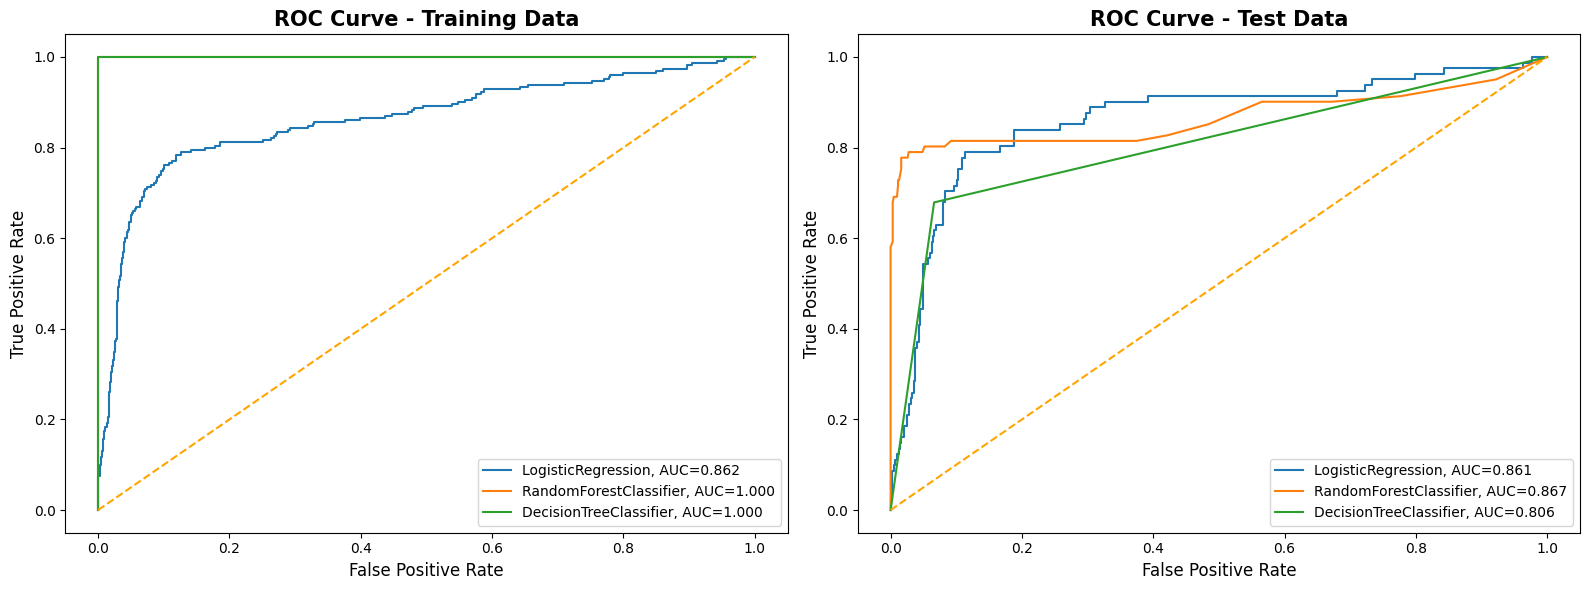

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# List of classifiers
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]

# Define a result table for training and test data
result_table = pd.DataFrame(columns=['classifiers', 'fpr_train', 'tpr_train', 'auc_train',
                                     'fpr_test', 'tpr_test', 'auc_test'])

# Train the models and record the results for both training and test data
for cls in classifiers:
    # Fit the model
    model = cls.fit(X_train, y_train)
    
    # Predictions for Training Data
    yproba_train = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, yproba_train)
    auc_train = roc_auc_score(y_train, yproba_train)
    
    # Predictions for Test Data
    yproba_test = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, yproba_test)
    auc_test = roc_auc_score(y_test, yproba_test)
    
    # Append results
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__],
                                                            'fpr_train': [fpr_train], 
                                                            'tpr_train': [tpr_train], 
                                                            'auc_train': [auc_train],
                                                            'fpr_test': [fpr_test], 
                                                            'tpr_test': [tpr_test], 
                                                            'auc_test': [auc_test]})], ignore_index=True)

# Set classifier names as index labels
result_table.set_index('classifiers', inplace=True)

# Plot ROC Curves for Training and Test Data
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Training Data Plot
ax[0].set_title('ROC Curve - Training Data', fontweight='bold', fontsize=15)
for i in result_table.index:
    ax[0].plot(result_table.loc[i]['fpr_train'], 
               result_table.loc[i]['tpr_train'], 
               label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc_train']))
ax[0].plot([0, 1], [0, 1], color='orange', linestyle='--')
ax[0].set_xlabel("False Positive Rate", fontsize=12)
ax[0].set_ylabel("True Positive Rate", fontsize=12)
ax[0].legend(loc='lower right')

# Test Data Plot
ax[1].set_title('ROC Curve - Test Data', fontweight='bold', fontsize=15)
for i in result_table.index:
    ax[1].plot(result_table.loc[i]['fpr_test'], 
               result_table.loc[i]['tpr_test'], 
               label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc_test']))
ax[1].plot([0, 1], [0, 1], color='orange', linestyle='--')
ax[1].set_xlabel("False Positive Rate", fontsize=12)
ax[1].set_ylabel("True Positive Rate", fontsize=12)
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Predict on the training data
y_train_pred = best_rf_model.predict(X_train)

# Step 2: Calculate metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Step 3: Predict on the test data
y_test_pred = best_rf_model.predict(X_test)

# Step 4: Calculate metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Step 5: Output the results as percentages for training and test data
print("**************** TRAINING DATA RESULTS ****************")
print(f"Accuracy: {train_accuracy * 100:.2f}%")
print(f"Precision: {train_precision * 100:.2f}%")
print(f"Recall: {train_recall * 100:.2f}%")
print(f"F1 Score: {train_f1 * 100:.2f}%")

print("\n**************** TEST DATA RESULTS ****************")
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {test_precision * 100:.2f}%")
print(f"Recall: {test_recall * 100:.2f}%")
print(f"F1 Score: {test_f1 * 100:.2f}%")

**************** TRAINING DATA RESULTS ****************
Accuracy: 98.09%
Precision: 100.00%
Recall: 82.06%
F1 Score: 90.15%

**************** TEST DATA RESULTS ****************
Accuracy: 95.29%
Precision: 98.00%
Recall: 60.49%
F1 Score: 74.81%


In [42]:
# Create the ROC Curve for both the train and test sets

# Calculate the probability scores of each point for the train and test sets
y_train_score = model.decision_function(X_train_resampled)
y_test_score = model.decision_function(X_test)

# Calculate the fpr,tpr and thresholds for the train and test sets
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_resampled,y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_score)

# Print the AUC for the train and test sets
print('Train Resampled AUC: {:.2f}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {:.2f}'.format(auc(test_fpr, test_tpr)))

# Plot the ROC curves for the train and test sets

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve (SMOTE)')
plt.legend(loc='lower right')
plt.show()

AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

In [47]:
# Data for the models
data = {'Metric': ['Training Accuracy', 'Testing Accuracy', 'Train AUC', 'Test AUC'],
    'Baseline Model':[0.64, 0.57, 0.89, 0.82],
    'SMOTE Model': [0.78, 0.57, 0.92, 0.82]}
    
    
# Create a DataFrame
base_smote_features_df = pd.DataFrame(data)
base_smote_features_df

,Metric,Baseline Model,SMOTE Model
0,Training Accuracy,0.64,0.78
1,Testing Accuracy,0.57,0.57
2,Train AUC,0.89,0.92
3,Test AUC,0.82,0.82


*************** MODEL COMPARISON RESULTS ***************
Training Data:
              classifiers       auc  accuracy
0      LogisticRegression  0.862025  0.901288
1  RandomForestClassifier  1.000000  1.000000
2  DecisionTreeClassifier  1.000000  1.000000

Best Model on Training Data: RandomForestClassifier (AUC: 1.000, Accuracy: 1.000)

Test Data:
              classifiers       auc  accuracy
0      LogisticRegression  0.860986  0.885714
1  RandomForestClassifier  0.879525  0.960000
2  DecisionTreeClassifier  0.823291  0.905714

Best Model on Test Data: RandomForestClassifier (AUC: 0.880, Accuracy: 0.960)


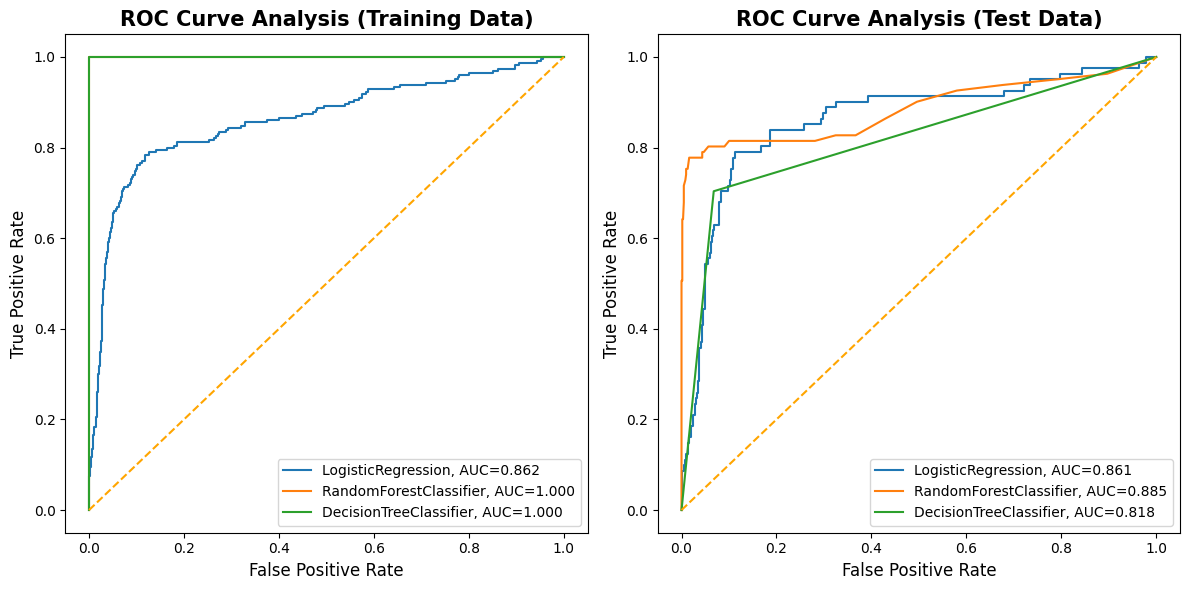

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Define classifiers
classifiers = [
    LogisticRegression(max_iter=1000),  # Increased max_iter for Logistic Regression
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

# Define result tables for training and test data
train_result_table = pd.DataFrame(columns=['classifiers', 'auc', 'accuracy'])
test_result_table = pd.DataFrame(columns=['classifiers', 'auc', 'accuracy'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)

    # Training data predictions
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_train_pred = model.predict(X_train)
    train_auc = roc_auc_score(y_train, y_train_proba)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test data predictions
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_test_pred = model.predict(X_test)
    test_auc = roc_auc_score(y_test, y_test_proba)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append results for training and test data
    train_result_table = pd.concat([train_result_table, 
                                     pd.DataFrame({'classifiers': [cls.__class__.__name__], 
                                                   'auc': [train_auc], 
                                                   'accuracy': [train_accuracy]})], 
                                    ignore_index=True)
    test_result_table = pd.concat([test_result_table, 
                                    pd.DataFrame({'classifiers': [cls.__class__.__name__], 
                                                  'auc': [test_auc], 
                                                  'accuracy': [test_accuracy]})], 
                                   ignore_index=True)

# Identify the best model for training and test data
best_train_model = train_result_table.loc[train_result_table['auc'].idxmax()]
best_test_model = test_result_table.loc[test_result_table['auc'].idxmax()]

# Display comparison results
print("*************** MODEL COMPARISON RESULTS ***************")
print("Training Data:")
print(train_result_table)
print("\nBest Model on Training Data: {} (AUC: {:.3f}, Accuracy: {:.3f})".format(
    best_train_model['classifiers'], best_train_model['auc'], best_train_model['accuracy']))

print("\nTest Data:")
print(test_result_table)
print("\nBest Model on Test Data: {} (AUC: {:.3f}, Accuracy: {:.3f})".format(
    best_test_model['classifiers'], best_test_model['auc'], best_test_model['accuracy']))

# Plot ROC curves for training and test data
plt.figure(figsize=(12, 6))

# Training ROC curves
plt.subplot(1, 2, 1)
plt.title('ROC Curve Analysis (Training Data)', fontweight='bold', fontsize=15)
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_train_proba)
    auc = roc_auc_score(y_train, y_train_proba)
    plt.plot(fpr, tpr, label="{}, AUC={:.3f}".format(cls.__class__.__name__, auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(prop={'size': 10}, loc='lower right')

# Test ROC curves
plt.subplot(1, 2, 2)
plt.title('ROC Curve Analysis (Test Data)', fontweight='bold', fontsize=15)
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    plt.plot(fpr, tpr, label="{}, AUC={:.3f}".format(cls.__class__.__name__, auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(prop={'size': 10}, loc='lower right')

plt.tight_layout()
plt.show()